# Perbandingan Metode Klasifikasi 

## Keterangan Dataset

Data yang digunakan merupakan data sekunder yang didapatkan dari website UCI machine learning. Data tersebut merupakan data antropometri dan parameter yang dapat dikumpulkan dalam analisis darah rutin di University Hospital Centre of Coimbra pada tahun 2018. Variabel-variabel tersebut akan digunakan untuk mendeteksi pasien merupakan penderita kanker payudara atau tidak. Terdapat 116 observasi pada dataset ini. Variabel yang digunakan dalam dataset ini terbagi atas dua, yaitu variabel prediktor (X) dan variabel respon (Y). Keterangan mengenai setiap variabel dijelaskan sebagai berikut. 
- Y > Classification : 1 (pasien sehat), 0 (pasien penderita kanker payudara)
- X1 > Usia (tahun)
- X2 > BMI (kg/m2)
- X3 > Glukosa (mg/dL)
- X4 > Insulin (miuU/mL)
- X5 > HOMA
- X6 > Leptin (ng/mL)
- X7 > Adiponectin (miug/mL)
- X8 > Resistin (ng/mL)
- X9 > MCP-1 (pg/dL)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from scipy import interp
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patches as patches
sns.set()

## Load Dataset

In [4]:
data=pd.read_csv('E:/Semester 7\Data Mining\TUGAS KLASIFIKASI\dataR2.csv')

In [5]:
data.shape

(116, 10)

In [6]:
data.head()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Sehat
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Sehat
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Sehat
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Sehat
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Sehat


## Pre-processing dan Karakteristik Data 

In [7]:
# Untuk mengetahui jumlah missing value 
data.isnull().sum()

Usia              0
BMI               0
Glukosa           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [8]:
data['Classification'].value_counts()

Kanker    64
Sehat     52
Name: Classification, dtype: int64

In [9]:
data['Classification'].value_counts(normalize=True)

Kanker    0.551724
Sehat     0.448276
Name: Classification, dtype: float64

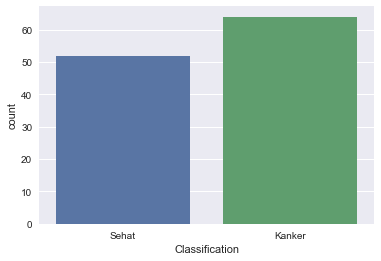

In [10]:
sns.countplot(x=data.Classification)
plt.show()

Berdasarkan perhitungan dan barchart di atas, maka dapat ditentukan benchmark untuk proses klasifikasi dianggap berhasil adalah 55.1724%. 

In [11]:
grouped_data = data.groupby(['Classification'])
grouped_data.mean()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
Kanker,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500
Sehat,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692


In [12]:
grouped_data = data.groupby(['Classification'])
grouped_data.std()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
Kanker,13.493155,4.620398,26.557440,12.317738,4.588943,19.212451,6.189466,12.636979,384.001622
Sehat,18.957999,5.427465,10.191529,4.859793,1.218256,19.334699,7.631281,11.447053,292.242157


In [13]:
grouped_data = data.groupby(['Classification'])
grouped_data.min()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
Kanker,34,18.37,70,2.432,0.507936,6.3339,1.65602,3.21000,90.090
Sehat,24,18.67,60,2.707,0.467409,4.3110,2.19428,3.29175,45.843


In [14]:
grouped_data = data.groupby(['Classification'])
grouped_data.max()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
Kanker,86,37.109375,201,58.460,25.050342,90.2800,33.75,55.2153,1698.440
Sehat,89,38.578759,118,26.211,7.111918,83.4821,38.04,82.1000,1256.083


In [15]:
grouped_data = data.groupby(['Classification'])
grouped_data.median()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
Kanker,53.0,27.408027,98.5,7.5800,2.052256,18.87765,8.446438,14.371825,465.3740
Sehat,65.0,27.694389,87.0,5.4835,1.139683,21.49485,8.127775,8.929190,471.3225


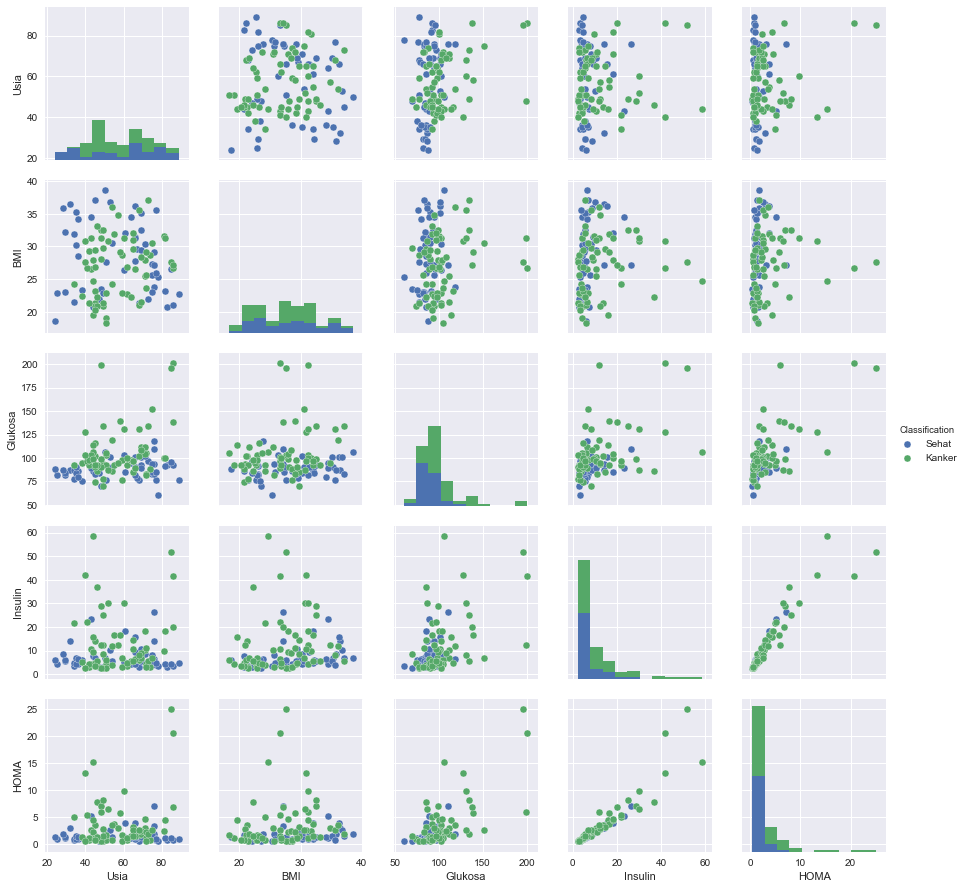

In [16]:
sns.pairplot(data=data[['Usia', 'BMI', 'Glukosa', 'Insulin', 'HOMA', 'Classification']], hue='Classification')
plt.show()

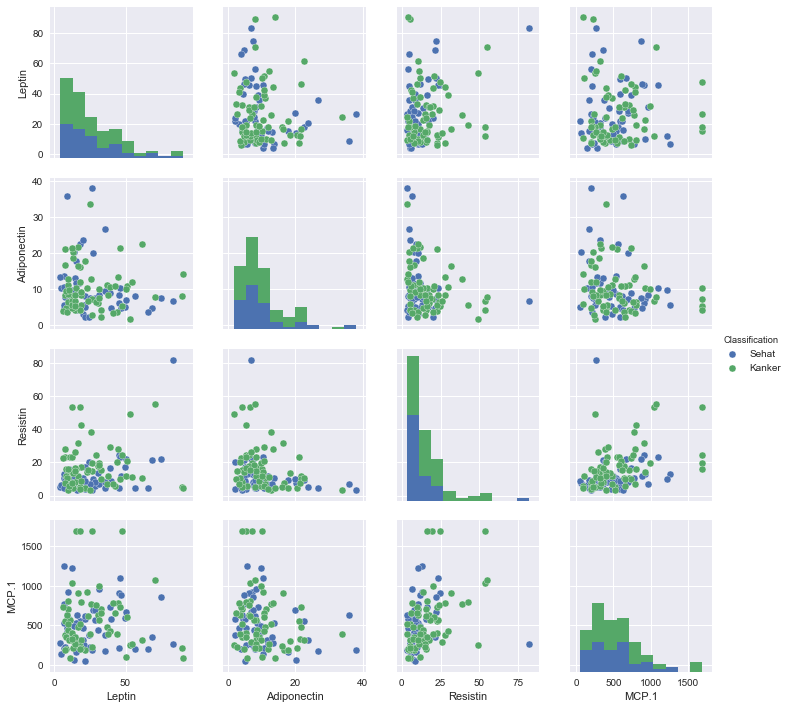

In [17]:
sns.pairplot(data=data[['Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']], hue='Classification')
plt.show()

In [18]:
data['Y']=LabelEncoder().fit_transform(data['Classification'])
data.head()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Y
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Sehat,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Sehat,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Sehat,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Sehat,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Sehat,1


In [19]:
data.tail()

,Usia,BMI,Glukosa,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Y
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,Kanker,0
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,Kanker,0
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,Kanker,0
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,Kanker,0
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,Kanker,0


## Feature Selection

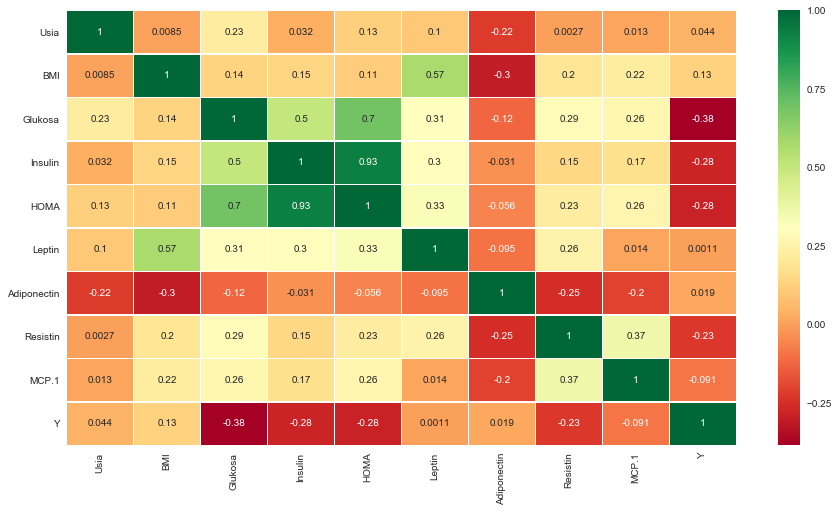

In [20]:
sns.heatmap(data.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Berdasarkan korelasi di atas, maka akan dipilih variabel yang memiliki korelasi lebih dari 0.1, yaitu BMI, Glukosa, Insulin, HOMA, dan Resistin

## Klasifikasi

### kNN

In [21]:
y = data['Y']
X = data.drop(['Usia','Leptin','Adiponectin','MCP.1','Classification','Y'], axis=1)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
kf = StratifiedKFold(n_splits=5, random_state=100)

In [23]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [24]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.6293807641633727, 0.6631422924901185, 0.6722002635046114, 0.6706851119894599, 0.7240777338603426, 0.7316534914361, 0.7237154150197629, 0.7241106719367589, 0.7498353096179182, 0.7237154150197629, 0.7399868247694334, 0.7827733860342556, 0.7486824769433464, 0.7486824769433464, 0.7657114624505927, 0.7573781291172595, 0.7399868247694334, 0.7490777338603426, 0.7392292490118576, 0.7649868247694335, 0.7392292490118576, 0.7490777338603426, 0.7403491436100131, 0.7483201581027668, 0.7308959156785243, 0.7395915678524374, 0.722562582345191, 0.7308959156785243, 0.7142292490118576, 0.731258234519104]


Text(0,0.5,'Cross-validated accuracy')

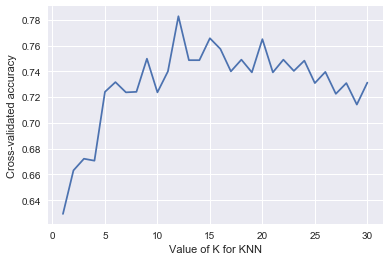

In [25]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')


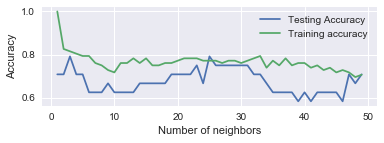

In [26]:
plt.title('k-NN Varying number of neighbors')
plt.subplot(2,1,2)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
y = np.squeeze(np.asarray(y))
X = np.squeeze(np.asarray(X))

In [28]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
n=5
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=n, random_state=100)
total=dict()
ac=dict()
se=dict()
sp=dict()
cm=dict()
for i,k in enumerate(neighbors):
    cm[i]=[]
    total[i]=[]
    ac[i]=[]
    se[i]=[]
    sp[i]=[]
    knn = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        cm[i].append((confusion_matrix(y_test, y_pred)).astype(float))

In [29]:
total=dict()
se=dict()
ac=dict()
sp=dict()
for i in range (len (neighbors)):
    total[i]=[]
    ac[i]=[]
    se[i]=[]
    sp[i]=[]
    for j in range (n):
        total[i].append(sum(sum(cm[i][j])))
        ac[i].append((cm[i][j][0,0]+cm[i][j][1,1])/total[i][j])
        sp[i].append(cm[i][j][0,0]/(cm[i][j][0,0]+cm[i][j][0,1]))
        se[i].append(cm[i][j][1,1]/(cm[i][j][1,0]+cm[i][j][1,1]))

In [30]:
np.mean(ac[0])
sensitiviti =np.empty(len(neighbors))
spesifisiti = np.empty(len(neighbors))
akurasi = np.empty(len(neighbors))
for i in range (len (neighbors)):
    akurasi[i]=np.mean(ac[i])
    spesifisiti[i]=np.mean(sp[i])
    sensitiviti[i]=np.mean(se[i])

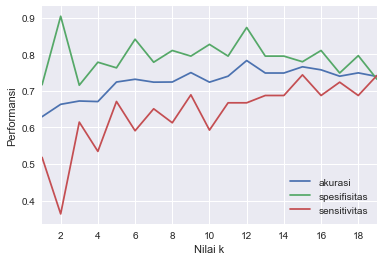

In [31]:
neighbors = np.arange(1, 20,1)
plt.plot(neighbors, akurasi, label='akurasi')
plt.plot(neighbors, spesifisiti, label='spesifisitas')
plt.plot(neighbors, sensitiviti, label='sensitivitas')
plt.legend()
plt.xlim(1,19)
plt.xlabel('Nilai k')
plt.ylabel('Performansi')
plt.savefig('Pemilihan nilaik',dpi=300)
plt.show()

In [32]:
np.arange(1, 19,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [33]:
df_k=pd.DataFrame()
performa=dict()
for j in range (3):
    performa[j] = []
for i in range (len (neighbors)):
    performa[0].append(akurasi[i])
    performa[1].append(sensitiviti[i])
    performa[2].append(spesifisiti[i])
for i in range (3):
    df_k=pd.concat([df_k,pd.DataFrame(performa[i])],axis=1)
df_k.columns=['Akurasi','sensitivitas','spesifisitas']

In [34]:
df_k

,Akurasi,sensitivitas,spesifisitas
0,0.629381,0.518182,0.716667
1,0.663142,0.363636,0.903846
2,0.672200,0.614545,0.715385
3,0.670685,0.534545,0.778205
4,0.724078,0.670909,0.762821
5,0.731653,0.590909,0.841026
6,0.723715,0.650909,0.778205
7,0.724111,0.612727,0.810256
8,0.749835,0.689091,0.794872
9,0.723715,0.592727,0.826923


Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa nilai k yang berbeda memberikan akurasi yang berbeda pula. Demikian juga dengan nilai specivicity dan sensitivity yang dihasilkan. Nilai akurasi tertinggi berada pada k=11, setelah itu nilai akurasi cenderung turun. Sedangkan nilai specivicity memiliki tren turun, dan sensitivity memiliki tren naik. Sehingga pemilihan k terbaik didasarkan pada nilai akurasi yang tertinggi yaitu k=11. 

Dengan nilai akurasi sebesar 78.2773%, maka dapat disimpulkan klasifikasi pasien ke dalam kelompok sehat dan penderita kanker payudara memiliki nilai akurasi yang cukup tinggi. Hal ini dikarenakan benchmark untuk klasifikasi yang telah ditentukan sebesar 55.1724%.

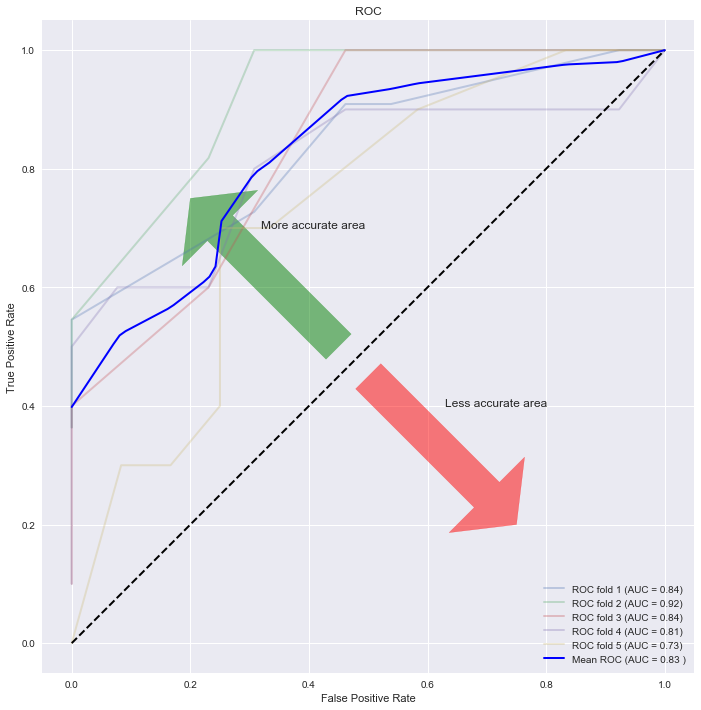

In [35]:
kf = StratifiedKFold(n_splits=5, random_state=100)
knn = KNeighborsClassifier(n_neighbors=11)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in kf.split(X,y):
    prediction = knn.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Kriteria nilai AUC yang digunakan sebagai perbandingan dinyatakan oleh Gorunescu (2011) pada (Suwarno & Abdillah, 2016). Berdasarkan nilai AUC sebesar 0.83, maka dapat disimpulkan hasil klasifikasi pasien ke dalam kelompok sehat dan penderita kanker payudara menggunakan metode kNN dengan k=11 merupakan good classification. 

## Naive Bayes 

In [36]:
gnb = GaussianNB() 
#Setup arrays to store training and test accuracies
n=5 #jumlah fold
skf=StratifiedKFold(n_splits=n, random_state=100)

cm=[]
total=[]
ac=[]
se=[]
sp=[]

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    cm.append((confusion_matrix(y_test, y_pred)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    sp.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    se.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi=np.mean(ac)
spesifisiti=np.mean(sp)
sensitiviti=np.mean(se)
#performansi masing masing fold->csv
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(se[i])
    test[2].append(sp[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Sensitivity','Spesifisitas']
df_k3

,Akurasi,Sensitivity,Spesifisitas
0,0.500000,0.909091,0.153846
1,0.541667,0.909091,0.230769
2,0.782609,0.900000,0.692308
3,0.608696,0.800000,0.461538
4,0.636364,0.900000,0.416667


In [37]:
print(akurasi)
print(sensitiviti)
print(spesifisiti)

0.6138669301712779
0.8836363636363638
0.391025641025641


Dengan nilai akurasi sebesar 61.3867%, maka dapat disimpulkan klasifikasi dengan metode naive bayes dianggap cukup berhasil karena nilai akurasi lebih dari benchmark yang telah ditentukan. Namun nilai specivicity dan sensitivity memiliki selisih yang cukup jauh. Sehingga dapat disimpulkan bahwa metode naive bayes cukup baik dalam mengelompokkan pasien sehat ke dalam kelompok sehat, namun kurang baik dalam mengelompokkan pasien penderita kanker payudara ke dalam kelompok penderita kanker payudara. 

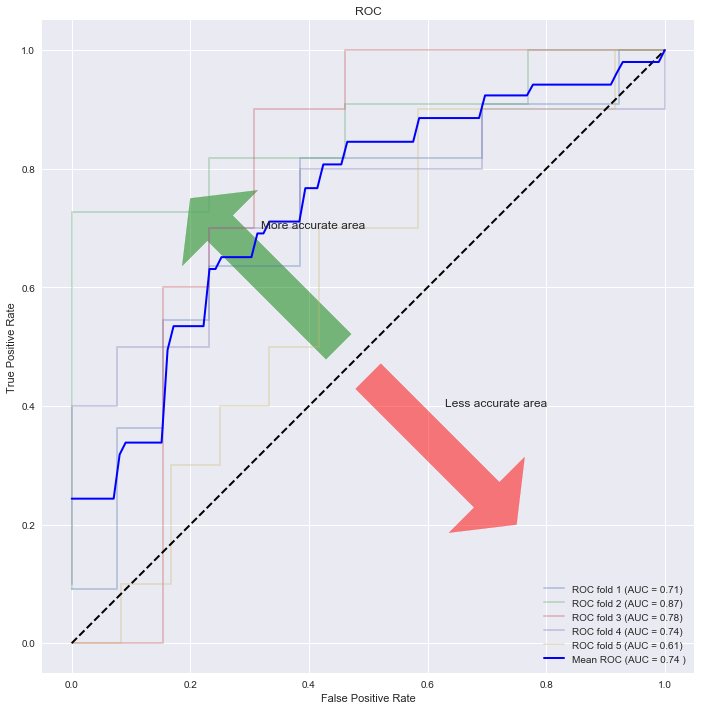

In [38]:
n=5 #jumlah fold
skf=StratifiedKFold(n_splits=n, random_state=100)
gnb = GaussianNB() 

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in skf.split(X,y):
    prediction = gnb.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Berdasarkan nilai AUC sebesar 0.74, maka dapat disimpulkan hasil klasifikasi pasien ke dalam kelompok sehat dan penderita kanker payudara menggunakan metode kNN dengan k=11 merupakan fair classification. 

## Random Forest 

In [39]:
skf = StratifiedKFold(n_splits=5, random_state=100)
rfc=RandomForestClassifier(random_state=100)

In [40]:
akurasi = cross_val_score(rfc, X, y, cv=skf, scoring='accuracy')
sensitivity = cross_val_score(rfc, X, y, cv=skf, scoring='recall')
presisi = cross_val_score(rfc, X, y, cv=skf, scoring='precision')
print (akurasi)
print (sensitivity)
print(presisi)

[0.70833333 0.75       0.73913043 0.73913043 0.5       ]
[0.54545455 0.81818182 0.4        0.6        0.6       ]
[0.75       0.69230769 1.         0.75       0.46153846]


In [41]:
print(np.mean(akurasi))
print(np.mean(sensitivity))
print(np.mean(presisi))

0.6873188405797102
0.5927272727272728
0.7307692307692308


Sama halnya dengan metode naive bayes, metode random forest juga memiliki nilai akurasi yang lebih tinggi jika dibandingkan dengan benchmark yang telah ditentukan.

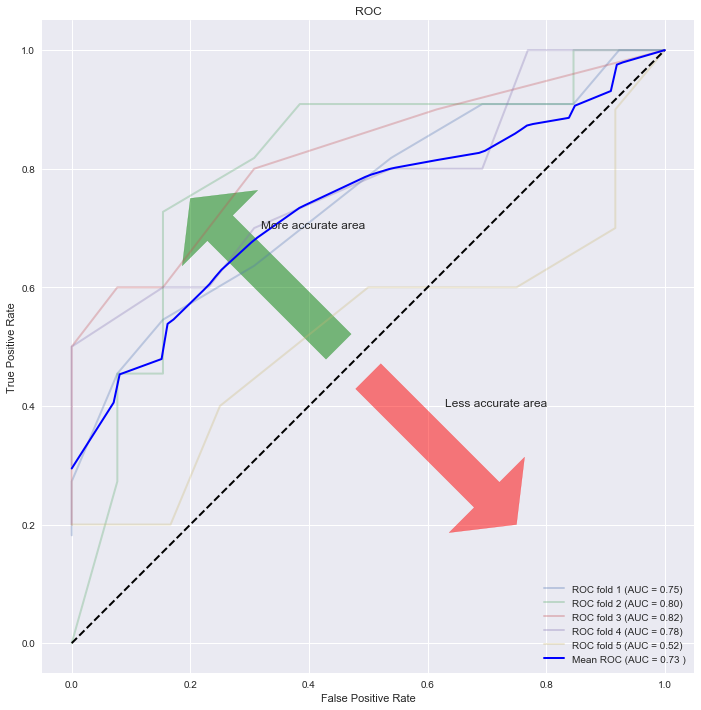

In [42]:
n=5 #jumlah fold
skf=StratifiedKFold(n_splits=n, random_state=100)
rfc=RandomForestClassifier(random_state=100)

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in skf.split(X,y):
    prediction = rfc.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Hasil klasifikasi dapat digolongkan ke dalam fair classification karena nilai AUC sebesar 0.73.

## SVM 

### SVM Linear

In [43]:
skf = StratifiedKFold(n_splits=5, random_state=100)
C = 2.0  # SVM regularization parameter
models = (svm.LinearSVC(C=C, random_state=100))

In [44]:
akurasi = cross_val_score(models, X, y, cv=skf, scoring='accuracy')
sensitivity = cross_val_score(models, X, y, cv=skf, scoring='recall')
presisi = cross_val_score(models, X, y, cv=skf, scoring='precision')
AUC = cross_val_score(models, X, y, cv=skf, scoring='roc_auc')
print (akurasi)
print (sensitivity)
print(presisi)
print (AUC)

[0.58333333 0.54166667 0.86956522 0.7826087  0.59090909]
[0.09090909 0.         0.8        0.5        0.6       ]
[1.         0.         0.88888889 1.         0.54545455]
[0.9020979  0.93706294 0.96153846 0.80769231 0.525     ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
print(np.mean(akurasi))
print(np.mean(sensitivity))
print(np.mean(presisi))
print(np.mean(AUC))

0.6736166007905138
0.39818181818181825
0.6868686868686869
0.8266783216783218


Hasil klasifikasi menggunakan metode SVM linear menghasilkan nilai AUC yang dapat digolongkan menjadi good classification. Namun nilai akurasi yang dihasilkan lebih rendah daripada menggunakan metode kNN.

### SVM dengan Kernel RBF

In [46]:
skf = StratifiedKFold(n_splits=5, random_state=100)
C = 2.0 # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.01, C=C, random_state=100))

In [47]:
akurasi = cross_val_score(models, X, y, cv=skf, scoring='accuracy')
sensitivity = cross_val_score(models, X, y, cv=skf, scoring='recall')
presisi = cross_val_score(models, X, y, cv=skf, scoring='precision')
AUC = cross_val_score(models, X, y, cv=skf, scoring='roc_auc')
print (akurasi)
print (sensitivity)
print(presisi)
print (AUC)

[0.75       0.625      0.7826087  0.73913043 0.63636364]
[0.45454545 0.72727273 0.6        0.6        0.8       ]
[1.         0.57142857 0.85714286 0.75       0.57142857]
[0.75524476 0.73426573 0.73846154 0.65384615 0.69166667]


In [48]:
print(np.mean(akurasi))
print(np.mean(sensitivity))
print(np.mean(presisi))
print(np.mean(AUC))

0.7066205533596837
0.6363636363636364
0.75
0.7146969696969697


Sama halnya dengan SVM linear, hasil klasifikasi menggunakan SVM dengan kernel RBF juga menghasilkan akurasi yang kurang dari akurasi metode kNN. Bahkan berdasarkan nilai AUC yang dihasilkan, hasil klasifikasi menggunakan SVM dengan kernel RBF termasuk dalam kategori fair classification. 

## Kesimpulan 

Metode terbaik yang dapat mengklasifikasikan pasien di University Hospital Centre of Combria ke dalam kelompok pasien sehat dan penderita kanker payudara adalah kNN dengan k=11. Metode ini menghasilkan nilai akurasi sebesar 78.27%. Nilai sensitivity yang dihasilkan sebesar 66.73%. Hal ini berarti bahwa metode kNN dengan k=11 mampu mengklasifikasikan pasien sehat ke dalam kelompok sehat secara benar sebesar 66.73%. Sedangkan dengan nilai specivicity sebesar 87.31%, berarti bahwa metode kNN dengan k=11 mampu mengklasifikasikan pasien penderita kanker payudara ke dalam kelompok pasien penderita kanker payudara secara benar sebesar 87.31%. 